In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline


In [8]:
# Data for voters at opening
df = pd.read_csv('prel_voters_3.txt', error_bad_lines=False, delimiter="\t") #error_bad_lines=False skips faulty lines

In [9]:
df.head()

,region,tik,uik,ik #,voters_at_opening,url
0,98 Город Байконур (Республика Казахстан),98 Город Байконур (Республика Казахстан),8140 УИК №8140,8140,0,http://www.vybory.izbirkom.ru/region/izbirkom?...
1,98 Город Байконур (Республика Казахстан),98 Город Байконур (Республика Казахстан),8141 УИК №8141,8141,0,http://www.vybory.izbirkom.ru/region/izbirkom?...
2,98 Город Байконур (Республика Казахстан),98 Город Байконур (Республика Казахстан),8142 УИК №8142,8142,0,http://www.vybory.izbirkom.ru/region/izbirkom?...
3,98 Город Байконур (Республика Казахстан),98 Город Байконур (Республика Казахстан),8143 УИК №8143,8143,0,http://www.vybory.izbirkom.ru/region/izbirkom?...
4,98 Город Байконур (Республика Казахстан),98 Город Байконур (Республика Казахстан),8144 УИК №8144,8144,0,http://www.vybory.izbirkom.ru/region/izbirkom?...


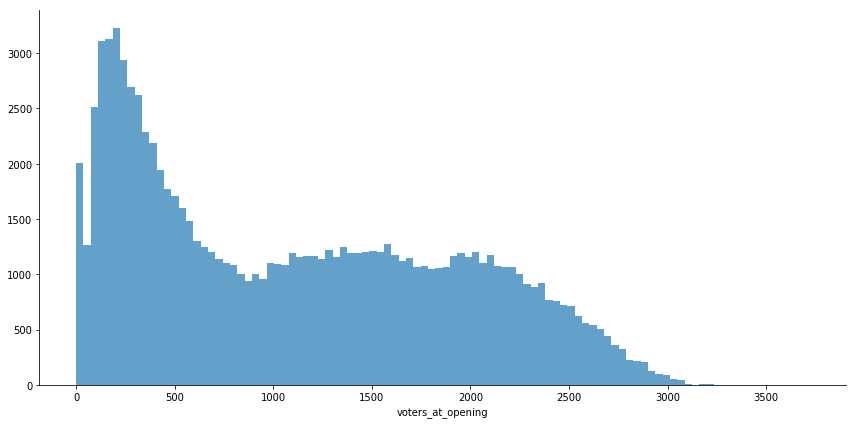

In [4]:
g = sns.FacetGrid(df,
                  palette='coolwarm',
                  size=6,
                  aspect=2,
                 )
g = g.map(plt.hist,
          'voters_at_opening',
          alpha = .7,
          bins=100,
         )

In [11]:
#error_bad_lines=False skips faulty lines
df_1 = pd.read_csv('table_227_level_2.txt', error_bad_lines=False, delimiter="\t")
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2776 entries, Республика Адыгея (Адыгея) to Ямало-Ненецкий автономный округ
Data columns (total 23 columns):
 #   Column                                                                                     Non-Null Count  Dtype  
---  ------                                                                                     --------------  -----  
 0   region                                                                                     2776 non-null   object 
 1   tik                                                                                        0 non-null      float64
 2   Число избирателей, включенных в список избирателей                                         2776 non-null   int64  
 3   Число избирательных бюллетеней, полученных участковой избирательной комиссией              2776 non-null   int64  
 4   Число избирательных бюллетеней, выданных избирателям, проголосовавшим досрочно             2776 non-null   int64  
 5   Ч

In [13]:
# Column translations

columns = ['region',
           'tik',
           'Number of voters included in the voters list',
           'The number of ballots received by the precinct election commission',
           'The number of ballots issued to voters who voted early',
           'The number of ballots issued in a polling station on election day',
           'The number of ballots issued outside the polling station on voting day',
           'Number of canceled ballot papers',
           'The number of ballot papers in mobile ballot boxes',
           'Number of ballots in stationary ballot boxes',
           'Number of invalid ballots',
           'Number of valid ballots',
           'Number of lost ballots',
           'The number of ballots not counted upon receipt',
           'Baburin Sergey Nikolaevich',
           'Grudinin Pavel Nikolaevich',
           'Zhirinovsky Vladimir Volfovich',
           'Putin Vladimir Vladimirovich',
           'Sobchak Ksenia Anatolievna',
           'Suraykin Maxim Alexandrovich',
           'Titov Boris Yurievich',
           'Yavlinsky Grigory Alekseevich',
           'url',
          ]

In [15]:
df_1.columns = columns

In [18]:
df_2 = pd.read_csv('table_227_level_3.txt', delimiter='\t') #error_bad_lines=False skips faulty lines

In [19]:
df_2.columns = ['region',
                'tik',
                'uik',
                'Number of voters included in the voter list',
                'Number of ballots received by the precinct election commission',
                'Number of ballots issued to voters who voted early',
                'Number of ballots issued in a polling station on election day',
                'Number of ballots issued outside the polling station on voting day',
                'Number of canceled ballot papers',
                'Number of ballot papers in mobile ballot boxes',
                'Number of ballots in stationary ballot boxes',
                'Number of invalid ballots',
                'Number of valid ballots',
                'Number of lost ballots','Number of ballots not counted upon receipt',
                'Baburin Sergey Nikolaevich',
                'Grudinin Pavel Nikolaevich',
                'Zhirinovsky Vladimir Volfovich',
                'Putin Vladimir Vladimirovich',
                'Sobchak Ksenia Anatolievna',
                'Suraykin Maxim Alexandrovich',
                'Titov Boris Yurievich',
                'Yavlinsky Grigory Alekseevich',
                'url',
               ]

In [21]:
# Get only interesting columns
df_2_new = df_2[['region',
                 'Number of voters included in the voter list',
                 'Number of invalid ballots',
                 'Number of valid ballots',
                 'Baburin Sergey Nikolaevich',
                 'Grudinin Pavel Nikolaevich',
                 'Zhirinovsky Vladimir Volfovich',
                 'Putin Vladimir Vladimirovich',
                 'Sobchak Ksenia Anatolievna',
                 'Suraykin Maxim Alexandrovich',
                 'Titov Boris Yurievich',
                 'Yavlinsky Grigory Alekseevich',
                ]]

In [25]:
#df_2_new['percent Putin'] = 100*df_2_new['Putin Vladimir Vladimirovich']/df_2_new['Number of valid ballots']

In [37]:
df_2_new['percent Putin'] = 100 * df_2_new['Putin Vladimir Vladimirovich'].divide(df_2_new['Number of valid ballots']).to_frame()

<ipython-input-37-8721da17b81f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2_new['percent Putin'] = 100 * df_2_new['Putin Vladimir Vladimirovich'].divide(df_2_new['Number of valid ballots']).to_frame()


In [43]:
df_2_new['percent invalid ballots'] = 100*df_2_new['Number of invalid ballots']/ (df_2_new['Number of invalid ballots']+df_2_new['Number of valid ballots'])

<ipython-input-43-23dee9634115>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2_new['percent invalid ballots'] = 100*df_2_new['Number of invalid ballots']/ (df_2_new['Number of invalid ballots']+df_2_new['Number of valid ballots'])


In [32]:
df_2_new.head()

,region,Number of voters included in the voter list,Number of invalid ballots,Number of valid ballots,Baburin Sergey Nikolaevich,Grudinin Pavel Nikolaevich,Zhirinovsky Vladimir Volfovich,Putin Vladimir Vladimirovich,Sobchak Ksenia Anatolievna,Suraykin Maxim Alexandrovich,Titov Boris Yurievich,Yavlinsky Grigory Alekseevich,per cent Putin,per cent invalid ballots
0,98 Город Байконур (Республика Казахстан),2132,9,1449,4,176,79,1136,30,9,5,10,78.398896,0.617284
1,98 Город Байконур (Республика Казахстан),2207,14,1470,2,128,87,1214,19,4,7,9,82.585034,0.943396
2,98 Город Байконур (Республика Казахстан),2249,27,1470,5,171,94,1162,17,3,12,6,79.047619,1.803607
3,98 Город Байконур (Республика Казахстан),1769,20,1093,5,98,72,882,17,8,5,6,80.695334,1.796945
4,98 Город Байконур (Республика Казахстан),1880,10,1174,7,124,105,902,7,9,10,10,76.831346,0.844595


## Histogram of all the poll sites and the percentage of reported invalid ballots

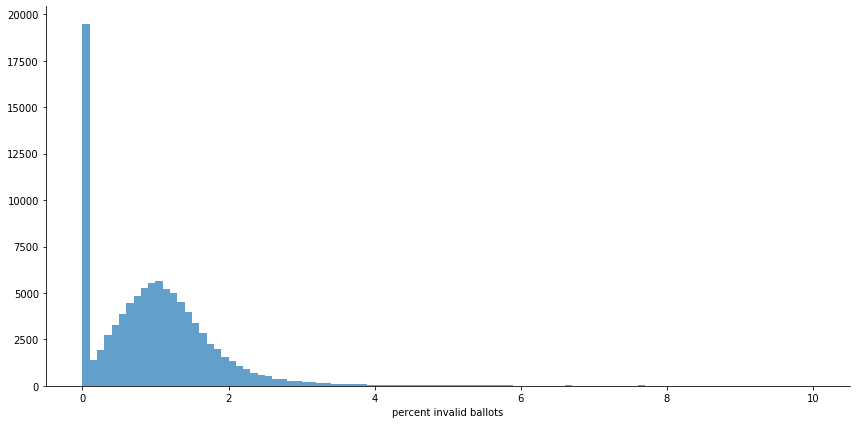

In [44]:
g = sns.FacetGrid(df_2_new,palette = 'coolwarm', height=6, aspect=2)
g = g.map(plt.hist, 'percent invalid ballots', alpha=.7, bins=100, range=(0,10))

In [45]:
len(df_2_new[df_2_new['percent invalid ballots']==0])

18969

In [35]:
len(df_2_new[df_2_new['Number of invalid ballots']==0])

18970

In [ ]:
## Histogram of all the polling sites with their results for Vladimir Putin

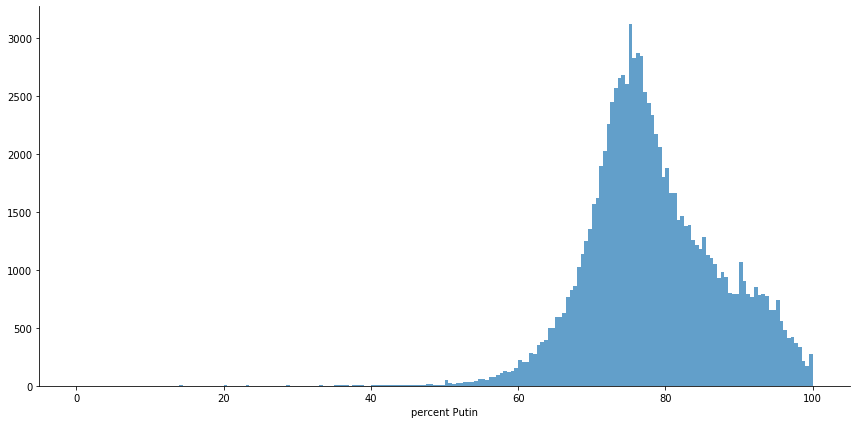

In [46]:
g = sns.FacetGrid(df_2_new, palette='coolwarm', size =6, aspect=2)
g = g.map(plt.hist, 'percent Putin', alpha = .7, bins=200, 
          #range=(0,10)
         )

In [47]:
df_2_new['percent Grudinin'] = 100*df_2_new['Grudinin Pavel Nikolaevich']/df_2_new['Number of valid ballots']

<ipython-input-47-ab76492fbe21>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2_new['percent Grudinin'] = 100*df_2_new['Grudinin Pavel Nikolaevich']/df_2_new['Number of valid ballots']


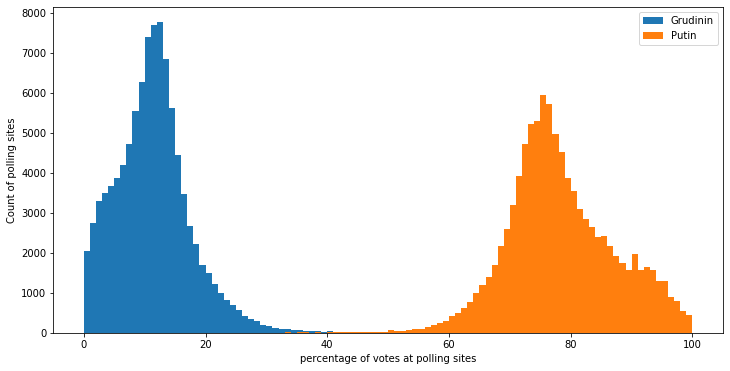

In [56]:
fig, ax = plt.subplots(figsize=(12,6))
ax.hist(df_2_new['percent Grudinin'], bins=100, range=(0,100))
ax.hist(df_2_new['percent Putin'], bins=100, range=(0,100))
ax.set_xlabel('percentage of votes at polling sites')
ax.set_ylabel('Count of polling sites')
ax.legend(['Grudinin', 'Putin'])
plt.show()

In [62]:
# New column for voter turnout
df_2_new['percent voter turnout']=100*(df_2_new['Number of invalid ballots']+df_2_new['Number of valid ballots'])/df_2_new['Number of voters included in the voter list']

<ipython-input-62-2874569e9e5f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2_new['percent voter turnout']=100*(df_2_new['Number of invalid ballots']+df_2_new['Number of valid ballots'])/df_2_new['Number of voters included in the voter list']


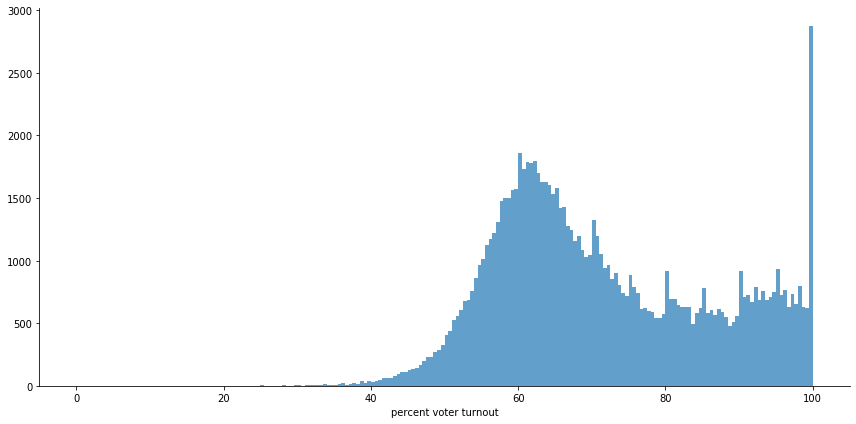

In [63]:
g = sns.FacetGrid(df_2_new,palette = 'coolwarm', size =6, aspect = 2)
g = g.map(plt.hist, 'percent voter turnout', alpha = .7, bins=200, 
          #range=(0,10)
         )

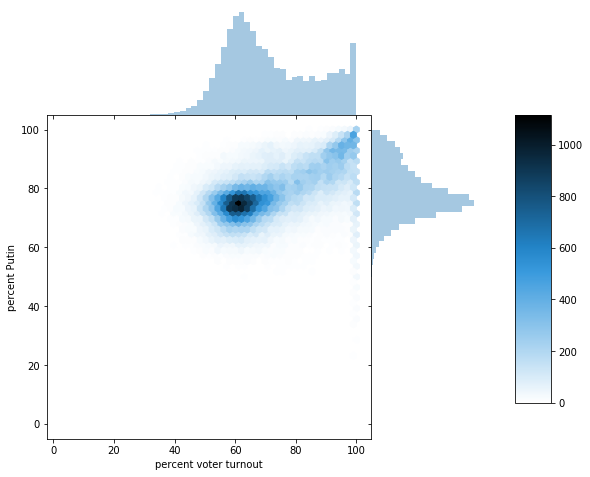

In [77]:
#fig, ax1 = plt.subplots(figsize=(12,6))

hexplot = sns.jointplot(x='percent voter turnout',
                        y='percent Putin',
                        data=df_2_new,
                        kind='hex',
                        height=10,
                        ratio=3,
                        stat_func=None,
                        space=0,
                       )

plt.subplots_adjust(left=0.2, right=0.8, top=0.8, bottom=0.2)  # shrink fig so cbar is visible
# make new ax object for the cbar
cbar_ax = hexplot.fig.add_axes([.85, .25, .05, .4])  # x, y, width, height
plt.colorbar(cax=cbar_ax)

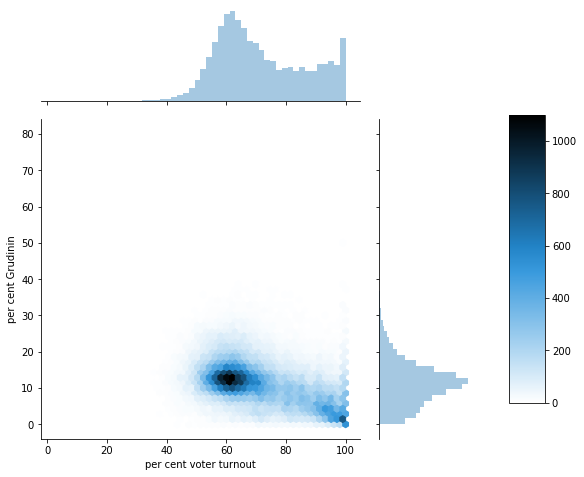

In [79]:

hexplot = sns.jointplot(x='per cent voter turnout',
                        y='per cent Grudinin',
                        data=df_2_new,
                        kind='hex',
                        size=10,
                        ratio=3,
                       )

plt.subplots_adjust(left=0.2, right=0.8, top=0.8, bottom=0.2)  # shrink fig so cbar is visible
# make new ax object for the cbar
cbar_ax = hexplot.fig.add_axes([.85, .25, .05, .4])  # x, y, width, height
plt.colorbar(cax=cbar_ax)

Text(0, 0.5, 'percent Putin')

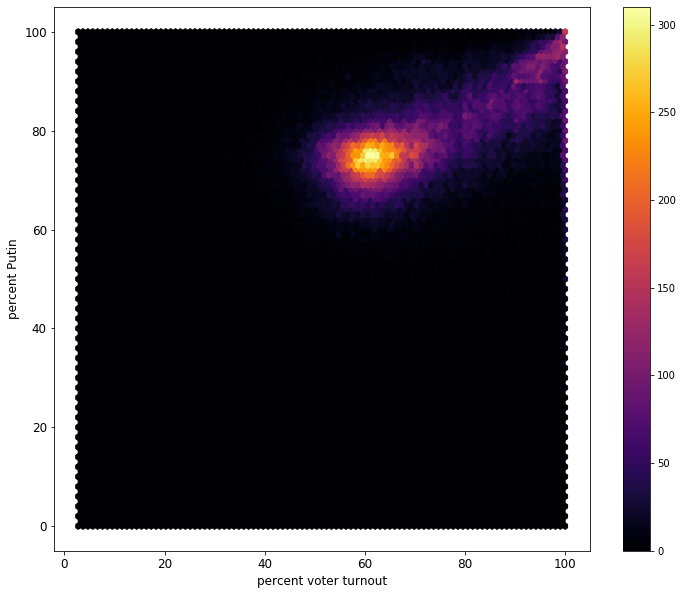

In [87]:
fig, ax1 = plt.subplots(figsize=(12,6))
df_2_new.plot(kind='hexbin',
              x ='percent voter turnout',
              y ='percent Putin',
              figsize=(12, 10),
              gridsize=(100, 50),
              cmap='inferno',
              fontsize=12,
              ax=ax1,
             )
ax1.set_xlabel('percent voter turnout', fontsize=12)
ax1.set_ylabel('percent Putin', fontsize=12)

Text(0, 0.5, 'percent Grudinin')

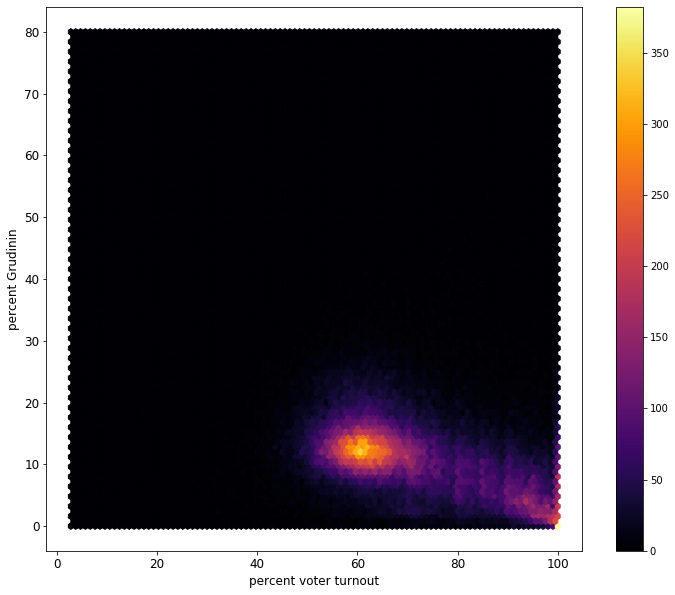

In [89]:
fig, ax1 = plt.subplots(figsize=(12,6))
df_2_new.plot(kind='hexbin',
              x ='percent voter turnout',
              y ='per cent Grudinin',
              figsize=(12, 10),
              gridsize=(100, 50),
              cmap='inferno',
              fontsize=12,
              ax=ax1,
             )
ax1.set_xlabel('percent voter turnout', fontsize=12)
ax1.set_ylabel('percent Grudinin', fontsize=12)